# 项目介绍

## 项目来源

> 2009 年当地第 84 号地方法律或《纽约市基准法》要求每年基准制定能源和用水信息。涵盖物业包括单栋建筑的税地，总建筑面积超过 50，000 平方英尺，税地块拥有多栋建筑，总建筑面积超过 100，000  sq 平方英尺。 从 2018 年开始，《纽约基准法》还将包括超过 25，000 平方英尺的物业。
 
此数据集包括 2016 年 8 月 1 日前向纽约市报告的 2015 年能源和水消耗数据的信息以及 2016 年涵盖建筑列表的数据。 指标由环境保护局的工具能源之星投资组合管理器计算，数据由业主自行报告。数据的公开提供允许地方和国家对建筑物的性能进行比较，激励最准确的能源使用基准，并通知能源管理决策。


## 项目目标
* 使用提供的建筑能源数据开发模型，预测建筑的能源之星得分

* 解释结果，找到最能预测得分的变量
## 必要库的导入
* 使用`sklearn`机器学习库
* 数据分析库`numpy`,`pandas`
* 数据可视化库`matplotlib`,`seaborn`

In [1]:
# 数据分析库
import pandas as pd 
import numpy as np

# 不显示警告
import warnings
warnings.filterwarnings("ignore")

# 导入可视化工具
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Heiti TC']# 显示中文字体
plt.rcParams['axes.unicode_minus']=False# 显示符号
plt.rcParams['font.size']=20# 字体大小
# 导入可视化seaborn
import seaborn as sns

# 把数据分为训练集和测试集
from sklearn.model_selection import train_test_split

# 一个 dataframe 最多显示60例
pd.set_option('display.max_columns', 60)

# 数据清洗和格式化
## 加载并检查数据

In [2]:
data=pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

### 数据字段定义

| Field                                                        | 文件                                            | 定义                                                         |
| :------------------------------------------------------------: | :-----------------------------------------------: | :------------------------------------------------------------: |
| Record Number                                                | 记录编号                                        | DOF  分配给每个基准提交的编号。此值对于由 BBL 字段表示的每个记录是唯一的。请注意，如果财政部没有收到基准报，则该列中没有分配的条目编号。 |
| Order                                                        | 顺序                                            | 数据集上的 BBL 顺序                                          |
| NYC Borough,  Block, and Lot (BBL)                           | 纽约市区、街区和地段 （BBL）                    | 10  位属性区、块和批号标识符，最初输入到"属性"<br>"备注"字段位于投资组合管理器中，然后在必要时由财务部 （DOF）  进行验证和更正。第一个数字代表自治市，其中1是曼哈顿，2是布朗克斯，3是布鲁克林，4是皇后区，5是斯塔顿岛。以下五个数字表示税块。如果属性的税块小于 5  位，则在块编号之前添加零，因此总共有五位数字。 最后四位数字是税批号。 |
| Co-reported BBL  Status                                      | 共同报告的 BBL 状态                             | 在同时报告多个  BBL（具有聚合能量、面积和水数据）的情况下，列出的第一个 BBL 被指定为"主数据库"，而后续 BBL  被指定为"辅助"。<br>对于这些共同报告的  BBL，此披露列表仅报告"主要"BBL  条目中的能源、面积、温室气体和水指标。"辅助"记录将用户引用回"主"BBL 记录。 |
| BBLs Co-reported                                             | BBLs  共同报告                                  | 列出通过项目组合管理器工具一起报告的 BBL。                   |
| Reported NYC Building Identification Numbers (BINs)          | 报告纽约大厦标识号                              | 自报七位楼宇识别号。                                         |
| Property Name                                                | 属性名称                                        | 基本属性信息包括属性名称。                                   |
| Parent Property ID                                           | 父属性 ID                                       | 园区的 ID 称为父属性 ID。                                    |
| Parent Property Name                                         | 父属性名称                                      | 当您对校园（或建筑物集合）进行基准测试时，您可以跟踪整个校园以及校园内各个建筑物的信息。如果您选择在这两个级别进行跟踪，则您具有"父子"关系。"家长"是整个校园或综合体。也就是说，母公司是多栋建筑物业，您也选择单独对各个建筑物进行基准测试。 |
| Street Number                                                | 街道编号                                        | 根据 DOF 记录，物业的房号。                                  |
| Street Name                                                  | 街道名称                                        | 属性的街道名称，根据 DOF 记录。                              |
| Zip Code                                                     | 邮政编码                                        | 按 DOF 记录的财产邮政编码。                                  |
| Borough                                                      | 区                                              | 根据 DOF 记录，该属性的自治市。                              |
| DOF Benchmarking Submission Status                           | DOF  基准提交状态                               | 指示 DOF 是否已收到截至08/01/14起的财产基准提交。应当指出，这不一定是遵守情况的迹象，屋宇部的代码执行司在稍后日期证实了这一点。 |
| Primary Property Type - Self Selected                        | 主属性类型 - 自选                               | 项目组合管理器中提供自报属性类型选项。                       |
| List of All Property Use Types at Property                   | 属性的所有属性使用类型列表                      | 以字母顺序分隔单个属性的所有属性类型的逗号列表。             |
| Largest Property Use Type                                    | 最大的属性使用类型                              | 具有该物业最大总建筑面积 （GFA）  的属性类型（例如：办公室）的名称。 |
| Largest Property Use Type - Gross Floor Area (ft²)           | 最大物业使用类型 -  总建筑面积（平方英尺）      | 最大属性类型的 GFA。                                         |
| 2nd Largest Property Use Type                                | 第二大物业使用类型                              | 具有该属性的第二大 GFA 的属性类型的名称（例如：Office）。    |
|                                                              |                                                 |                                                              |
| 2nd Largest Property Use - Gross Floor Area (ft²)            | 第二大物业使用 -总建筑面积（平方英尺）          | 第二大属性类型的 GFA。                                       |
|                                                              |                                                 |                                                              |
| 3rd Largest Property Use Type                                | 第三大属性使用类型                              | 具有该属性的第三大 GFA  的属性类型的名称（例如：Office）。   |
| 3rd Largest Property Use Type - Gross Floor Area (ft²)       | 第三大属性使用类型-  总建筑面积（英尺2）        | 第三大属性类型的 GFA。                                       |
|                                                              |                                                 |                                                              |
| Year Built                                                   | 建成年份                                        | 今年是您财产的建造年份。如果您的房产经过全面翻修，包括清理和重建内部，则可以将翻新日期注明为建造年份。如果您不知道房产的建造的确切年份，请输入估计值。 |
| Number of Buildings - Selfreported                           | 建筑物数量 -自报                                | 建筑物数表示位于多建筑属性上的建筑物总数。每当创建多构建属性时，您都会在投资组合管理器中输入此值。 |
| Occupancy                                                    | 入住                                            | 您物业占用和运营的楼面总面积 （GFA） 的百分比。              |
| Metered Areas (Energy)                                       | 计量区域（能源）                                | 计量区域是您建筑物内哪些区域由您的能源和水表覆盖的指定区域。 |
| Metered Areas (Water)                                        | 计量区域（水）                                  | 计量区域是您建筑物内哪些区域由您的能源和水表覆盖的指定区域。 |
| ENERGY STAR Score                                            | 能源之星分数                                    | 指定建筑类型的 1 到 100  百分位排名，在投资组合管理器中计算，基于报告年度的自报能耗。 |
| Site EUI (kBtu/ft2)                                          | 站点 EUI （kBtu/ft2）                           | 能源使用强度由投资组合经理计算在物业现场以kBtus每平方英尺（kBtu/英尺2），报告年度。 |
| Weather Normalized Site EUI (kBtu/ft2)                       | 天气标准化站点 EUI  （kBtu/ft2）                | 能源使用强度由投资组合经理计算在物业现场以kBtus每平方英尺（kBtu/英尺2）的报告年度，标准化的天气。 |
| Weather Normalized Site Electricity Intensity (kWh/ft²)      | 天气标准化站点电力强度（千瓦时/平方英尺）       | 天气标准化现场能源除以财产大小或流经水/废水处理厂。          |
| Weather Normalized Site Natural Gas Intensity (therms/ft²)   | 天气标准化站点天然气强度  （热气垫/平方英尺）   | 天气标准化现场能源除以财产大小或流经水/废水处理厂。          |
| Source EUI (kBtu/ft2)                                        | 源 EUI （kBtu/ft2）                             | 能源使用强度由投资组合经理计算，在能源发电来源以kBtus每平方平方英尺（kBtu/英尺2），报告年度。 |
| Weather Normalized Source EUI(kBtu/ft2)                      | 欧盟天气标准化源（kBtu/英尺2）                  | 能源使用强度由投资组合经理计算，在能源发电来源以kBtus每平方平方英尺（kBtu/英尺2）的报告年度，标准化的天气。 |
| Fuel Oil #1 Use (kBtu)                                       | 燃料油#1使用 （kBtu）                           | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总计可用于燃油  # 1。 |
| Fuel Oil #2 Use (kBtu)                                       | 燃料油#2使用 （kBtu）                           | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总计可用于燃油  # 2。 |
| Fuel Oil #4 Use (kBtu)                                       | 燃料油#4使用 （kBtu）                           | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总计可用于燃油  # 4。 |
| Fuel Oil #5 & 6 Use (kBtu)                                   | 燃料油#5及6使用  （kBtu）                       | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总计可用于燃油  # 5&6。 |
| Diesel #2 Use (kBtu)                                         | 柴油#2使用 （kBtu）                             | 按类型使用能源是单个类型能源的年度消耗的摘要。柴油#2提供年度总计。 |
| District Steam Use (kBtu)                                    | 地区蒸汽使用 （kBtu）                           | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总计可用于区域蒸汽。 |
| District Hot Water Use (kBtu)                                | 地区热水使用 （kBtu）                           | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总计可用于地区热水。 |
| District Chilled Water Use (kBtu)                            | 地区冷水使用 （kBtu）                           | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总量可用于地区冷水。 |
| Natural Gas Use (kBtu)                                       | 天然气使用 （kBtu）                             | 按类型使用能源是单个类型能源的年度消耗的摘要。天然气的年总量可用。 |
| Weather Normalized Site Natural Gas Use (therms)             | 天气标准化站点天然气使用 （热）                 | 在use30 年的平均天气条件下，您的财产将使用的能源             |
| Electricity Use - Grid Purchase (kBtu)                       | 用电量 - 电网购买  （kBtu）                     | 按类型使用能源是单个类型能源的年度消耗的摘要。年度总计可用于电力使用  - 电网购买。 |
| Weather Normalized Site Electricity (kWh)                    | 天气标准化现场电力 （kWh）                      | 在use30 年的平均天气条件下，您的财产将使用的能源             |
| Total GHG Emissions (MtCO2e)                                 | 温室气体排放总量（百万吨2e）                    | 财产排放的直接和间接温室气体总量，报告年度以公吨二氧化碳当量（MtCO2e）为单位。 |
| Direct GHG Emissions (MtCO2e)                                | 直接温室气体排放（百万吨/2平方米）              | 该财产排放的直接温室气体总量，以公吨二氧化碳当量（MtCO2e）为单位报告。 |
| Indirect GHG Emissions (MtCO2e)                              | 间接温室气体排放（百万吨/2平方米）              | 该财产排放的间接温室气体总量，报告年度以公吨二氧化碳当量（MtCO  22e）为单位。 |
| DOF Property Floor Area (ft2)                                | DOF  物业楼层面积 （英尺2）                     | 根据 DOF 记录，该物业的总面积。                              |
| GFA - Self-reported (ft²)                                    | 财产 GFA - 自我报告（英尺2）                    | 自报物业总面积（英尺2）                                      |
| Water Use (All Water Sources) (kgal)                         | 用水（所有水源） （千金）                       | 所有水表的总和。                                             |
| Municipally Supplied Potable Water - Indoor Intensity (gal/ft²) | 市政供应的可饮用水 -  室内强度（加仑/平方英尺） | 报告年度，该物业的室内用水总量（每平方英尺（加仑/英尺2）为加仑。 |
| Automatic Water Benchmarking Eligible                        | 自动水基准测试符合                              | 指示物业是否有资格使用环境保护部通过项目组合管理器中的自动基准服务（"ABS"）功能上传的水基准数据。 |
| Release Date                                                 | 发布日期                                        | 通过市/市投资组合管理模板重新提交提交的日期。                |
| Reported Water Method                                        | 报告水法                                        | 指示用水是环境保护部通过项目组合管理器中的自动基准服务（"ABS"）功能上传的，还是通过手动输入（"手动"）自行报告。 |

## 数据类型和缺失值
利用`DataFrame.info()`查看数据类型

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

由于该数据集合将缺失数据标记为`Not Available`，而不是np.nan，存在将一些数字类型列变成字符串类型列
### 将数据类型转换为正确格式

In [4]:
# 修改缺失值字段
data = data.replace({'Not Available':np.nan})

In [5]:
#手动筛选数字类型的列，记录列号
# n=[18,20,22,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,56,57,58]
# n_=data.columns[n]
# data[n_]=data[n_].astype('float')# 修改字符类型
# data.info()
#将“Not Available”项替换为可以解释为浮点数的np.nan

# 一些明确包含数字（例如ft²）的列被存储为object类型。 我们不能对字符串进行数值分析，因此必须将其转换为数字（特别是浮点数）数据类型
# 对列数进行迭代
for col in list(data.columns):
    # 选择需要被数字化的列，通过if 判断实现
    # 凡是包含下列红色字体的列，都需要被转化为数据类型
    if ('ft²'in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col 
        or 'therms' in col or 'gal' in col or 'Score' in col):
        # 将数据类型转换为float
        data[col] = data[col].astype(float)
        

In [6]:
# 描述数字变量基本的统计信息
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

In [7]:
# 描述字符串变量基本的统计信息
data.describe(include=['O'])

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,2nd Largest Property Use Type,3rd Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
count,11746,11746,11746,11735,11735,11584,11746,207,11746,11622,11624,11628,11746,11746,11744,3741,1484,11689,7137,11746,11628,11716,9483
unique,11740,102,103,11580,11581,11507,11645,176,286,4198,2024,5,55,813,53,58,49,7,6,3537,2,1,144
top,Fairchild,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1019730001,1019730001,4455438,410 West 118th Street,Default Info,10022,1,BROADWAY,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Retail Store,Retail Store,Whole Building,Whole Building,05/01/2017 02:58:14 PM,Yes,In Compliance,Midtown-Midtown South ...
freq,2,11324,11324,26,26,13,12,14,269,66,390,5176,8688,6182,8694,948,297,11648,7111,1258,7552,11716,720


## 处理缺失数据

In [8]:
mis_value=pd.DataFrame(data.count(),columns=['个数'])
mis_value['缺失比%']=mis_value['个数']/11746*100
mis_value.sort_values(by='缺失比%',ascending=False)

,个数,缺失比%
Order,11746,100.000000
Primary Property Type - Self Selected,11746,100.000000
Property Name,11746,100.000000
Parent Property Id,11746,100.000000
Parent Property Name,11746,100.000000
Property Id,11746,100.000000
Occupancy,11746,100.000000
Number of Buildings - Self-reported,11746,100.000000
Address 1 (self-reported),11746,100.000000
Year Built,11746,100.000000


* 数据共有11746
* ENERGY STAR Score总计9642个数据，缺失率为82.087519

对于数据缺失率小于50%予以剔除

In [9]:
missing_col=mis_value[mis_value['缺失比%']<50].index
data=data.drop(missing_col,axis=1)

# 探索性数据分析
探索数据，目的是找到异常，模式，趋势或关系
## 单变量图
为了探索ENERGY STAR Score的关系，针对该变量查看变量分布情况

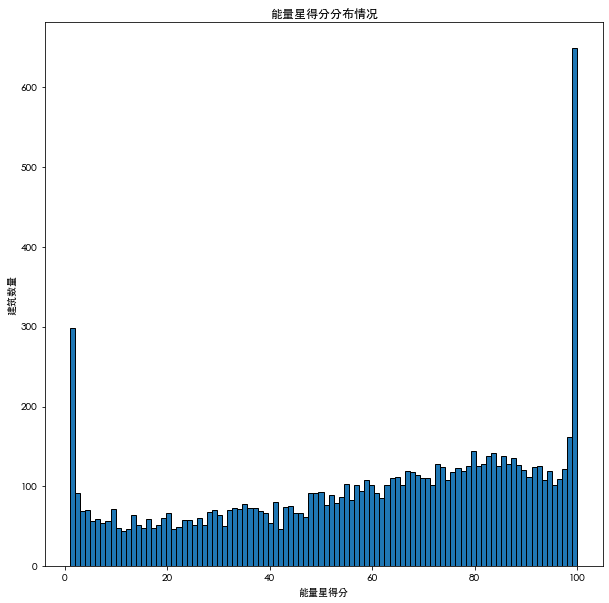

In [10]:
plt.figure(figsize=(10,10))
plt.xlabel('能量星得分')
plt.ylabel('建筑数量')
plt.title('能量星得分分布情况')
plt.hist(data['ENERGY STAR Score'].dropna(),bins=100,edgecolor='K')
plt.show()

能量星得分描述的是建筑类型1-100分位的排名情况，结果显示处于两端1和100的数字出现异常情况

对比能量星得分，选取能源使用强度（EUI）对比
$$能源使用强度（EUI）=\frac{总能源使用情况}{建筑面积（ft^2）}$$
*这个数值相比较客观*

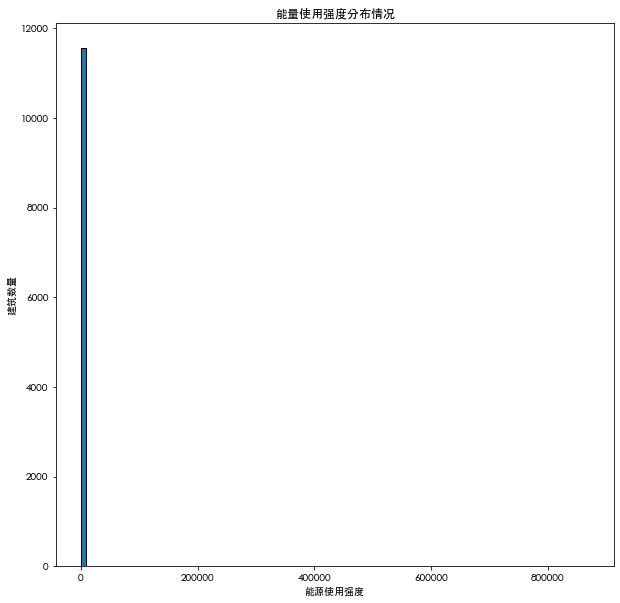

In [11]:
plt.figure(figsize=(10,10))
plt.xlabel('能源使用强度')
plt.ylabel('建筑数量')
plt.title('能量使用强度分布情况')
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins=100,edgecolor='K')
plt.show()

发现仍存在存在异常值导致图片倾斜。

In [12]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
data.loc[data['Site EUI (kBtu/ft²)']==869265.0,:]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


##  去除异常值

由`data['Site EUI (kBtu/ft²)'].describe()`得到


| 描述统计量 | 数值    |
| ----- | ---------- |
| count | 11583      |
| mean  | 280.071484 |
| std   | 8607.17888 |
| min   | 0          |
| 25%   | 61.8       |
| 50%   | 78.5       |
| 75%   | 97.6       |
| max	|   869265   |


极端离群值是位于第一个四分位数以下或第三个四分位数以上的四分位数间距的3.0倍以上的任何数据值。
$$四分位间距（IQR)=Q3-Q1$$

In [15]:
iqr=97.6-61.8
data = data [(data['Site EUI (kBtu/ft²)']>(61.8- 3*iqr)) & (data['Site EUI (kBtu/ft²)']<(97.6 + 3*iqr))]

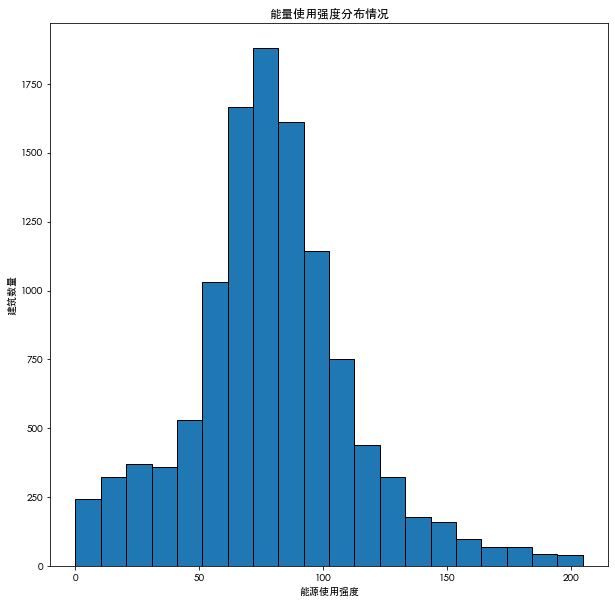

In [16]:
plt.figure(figsize=(10,10))
plt.xlabel('能源使用强度')
plt.ylabel('建筑数量')
plt.title('能量使用强度分布情况')
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins=20,edgecolor='K')
plt.show()

图像相对呈现正态度分布
## 寻找关系
查看分类变量（字符串类型的变量）对分数的影响，通过绘制分类密度图查看

In [17]:
#  可以通过subset参数来删除在age和sex中含有空数据的全部行
types=data.dropna(subset=['ENERGY STAR Score'])

In [18]:
# 查看不同建筑类型的分布情况
alltypes_n=types['Largest Property Use Type'].value_counts()
alltypes_n

Multifamily Housing                      7464
Office                                   1157
Hotel                                     202
Non-Refrigerated Warehouse                156
K-12 School                                97
Residence Hall/Dormitory                   96
Senior Care Community                      85
Distribution Center                        61
Retail Store                               57
Medical Office                             23
Hospital (General Medical & Surgical)      15
Financial Office                           12
Supermarket/Grocery Store                  10
Worship Facility                            9
Refrigerated Warehouse                      8
Parking                                     3
Wholesale Club/Supercenter                  3
Courthouse                                  2
Bank Branch                                 1
Name: Largest Property Use Type, dtype: int64

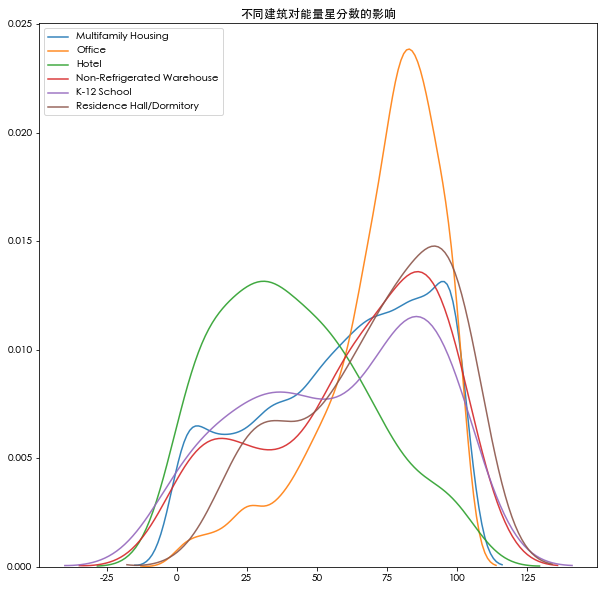

In [19]:
T=list(alltypes_n.index)
T=T[:6]#截选数据较大前7进行分析 
plt.figure(figsize=(10,10))
for t in T:
    subset=data[data['Largest Property Use Type']==t]
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),label=t,shade=False,alpha=0.9)
plt.title('不同建筑对能量星分数的影响')
plt.show()

显示，办公室有较高分数，酒店分数较低，作为分类变量，建筑对能量分存在影响，故要考虑进去。

同时，地区可能也存在影响，以`borough`区作为分类（坐标建模相对复杂）

In [20]:
# 查看不同建筑类型的分布情况
allborough_n=types['Borough'].value_counts()
allborough_n

Manhattan        3985
Brooklyn         1947
Queens           1707
Bronx            1655
Staten Island     119
Name: Borough, dtype: int64

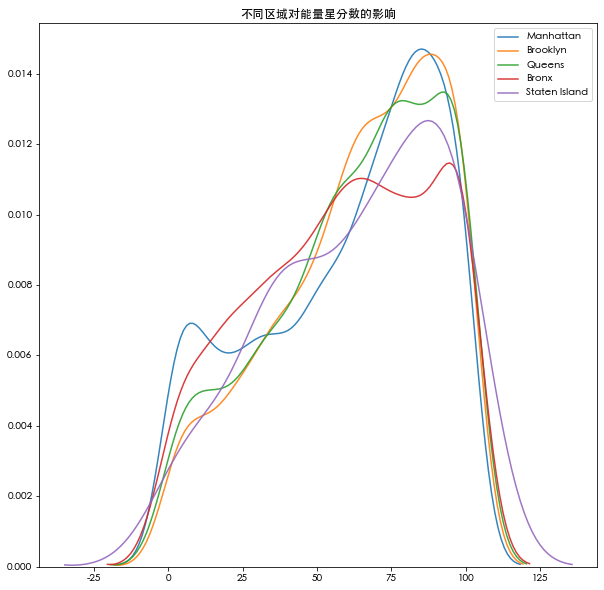

In [21]:
B=list(allborough_n.index)
plt.figure(figsize=(10,10))
for b in B:
    subset=data[data['Borough']==b]
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),label=b,shade=False,alpha=0.9)
plt.title('不同区域对能量星分数的影响')
plt.show()

相对区域而言，不同建筑对能量分的影响更为显著
## 特征与目标之间的相关性
为了量化变量与目标的相关性，计算pearson相关系数，考察变量间线性关系强度及方向

In [22]:
corr=data.corr()['ENERGY STAR Score'].sort_values()
corr.head(5)#负相关前五

Site EUI (kBtu/ft²)                                       -0.723864
Weather Normalized Site EUI (kBtu/ft²)                    -0.713993
Weather Normalized Source EUI (kBtu/ft²)                  -0.645542
Source EUI (kBtu/ft²)                                     -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)   -0.358394
Name: ENERGY STAR Score, dtype: float64

In [23]:
corr.tail(6)# 正相关前五

Property GFA - Self-Reported (ft²)                    0.017360
Largest Property Use Type - Gross Floor Area (ft²)    0.018330
Order                                                 0.036827
Community Board                                       0.056612
Council District                                      0.061639
ENERGY STAR Score                                     1.000000
Name: ENERGY STAR Score, dtype: float64

探索变量与变量之间的相关性，同时，求出变量与分数相关性的值

得到能量分负相关前五：
* Site EUI (kBtu/ft²)                                      
* Weather Normalized Site EUI (kBtu/ft²)                   
* Weather Normalized Source EUI (kBtu/ft²)                  
* Source EUI (kBtu/ft²)                                     
* Weather Normalized Site Electricity Intensity (kWh/ft²) 

正相关前五：

* Property GFA - Self-Reported (ft²)                    
* Largest Property Use Type - Gross Floor Area (ft²)   
* Order                                                
* Community Board                                       
* Council District  

考虑变量可能与存在非线性关系，采用**平方根**和**对数**分别计算相关系数

In [24]:
num_col=data.select_dtypes('number')
for col in num_col.columns:
    if col == 'ENERGY STAR Score':
        pass
    else:
        num_col[col+'_sqrt']=np.sqrt(num_col[col])
        num_col[col+'_log']=np.log(num_col[col])
        
num_col.head(5)

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,Order_sqrt,...,Weather Normalized Site Natural Gas Use (therms)_sqrt,Weather Normalized Site Natural Gas Use (therms)_log,Electricity Use - Grid Purchase (kBtu)_sqrt,Electricity Use - Grid Purchase (kBtu)_log,Weather Normalized Site Electricity (kWh)_sqrt,Weather Normalized Site Electricity (kWh)_log,Total GHG Emissions (Metric Tons CO2e)_sqrt,Total GHG Emissions (Metric Tons CO2e)_log,Direct GHG Emissions (Metric Tons CO2e)_sqrt,Direct GHG Emissions (Metric Tons CO2e)_log,Indirect GHG Emissions (Metric Tons CO2e)_sqrt,Indirect GHG Emissions (Metric Tons CO2e)_log,Property GFA - Self-Reported (ft²)_sqrt,Property GFA - Self-Reported (ft²)_log,Water Use (All Water Sources) (kgal)_sqrt,Water Use (All Water Sources) (kgal)_log,Water Intensity (All Water Sources) (gal/ft²)_sqrt,Water Intensity (All Water Sources) (gal/ft²)_log,Source EUI (kBtu/ft²)_sqrt,Source EUI (kBtu/ft²)_log,Latitude_sqrt,Latitude_log,Longitude_sqrt,Longitude_log,Community Board_sqrt,Community Board_log,Council District_sqrt,Council District_log,Census Tract_sqrt,Census Tract_log
12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN,3.872983,...,143.080397,9.926813,3352.898164,16.235161,1802.707741,14.994090,34.554305,7.085064,12.280065,5.015954,32.298607,6.950048,657.649603,12.977345,148.529458,10.001567,7.142129,3.932022,9.375500,4.476200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,20,2777309,NaN,323000.0,1907,7,100,NaN,120.0,125.2,8.7,0.9,193.6,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,NaN,NaN,188.7,NaN,NaN,NaN,NaN,NaN,4.472136,...,746.322718,13.230316,4237.704638,16.703554,2284.088965,15.467445,67.488518,8.423915,53.741976,7.968389,40.822788,7.418481,773.304597,13.301346,NaN,NaN,NaN,NaN,13.736812,5.240158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,NaN,NaN,NaN,NaN,NaN,4.582576,...,94.373195,9.094514,1992.145000,15.193934,1059.212821,13.930563,43.513216,7.546129,39.052529,7.329815,19.191144,5.908898,566.977954,12.680641,76.912938,8.685348,4.289522,2.912351,10.163661,4.637637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,22,4988574,179130.0,204720.0,1939,1,100,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,40.857943,-73.934962,12.0,10.0,281.0,4.690416,...,74.862541,8.631307,1699.073924,14.875677,905.547459,13.617079,34.704467,7.093737,30.602287,6.842150,16.367651,5.590614,452.459943,12.229398,NaN,NaN,NaN,NaN,10.324728,4.669084,6.392022,3.710101,NaN,NaN,3.464102,2.484907,3.162278,2.302585,16.763055,5.638355
20,23,4988569,102150.0,116744.0,1939,1,100,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,40.858256,-73.934734,12.0,10.0,281.0,4.795832,...,57.462161,8.102253,1040.091054,13.894127,555.044683,12.638097,26.248809,6.535241,24.261080,6.377747,10.019980,4.609162,341.678211,11.667739,NaN,NaN,NaN,NaN,9.884331,4.581902,6.39

将街区和建筑one-hot编码转化为数字变量，考虑相关性分析内

In [25]:
s_col=data[['Borough','Largest Property Use Type']]
#one hot 编码
s_col=pd.get_dummies(s_col)#选中是1，未选中为0

#拼接数据
features=pd.concat([s_col,num_col],axis=1)
features=features.dropna(subset=['ENERGY STAR Score'])
corr_=data.corr()['ENERGY STAR Score'].sort_values()
corr_.head(15)

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [26]:
corr_.tail(15)

Property Id                                          -0.046605
Indirect GHG Emissions (Metric Tons CO2e)            -0.043982
Longitude                                            -0.037455
Occupancy                                            -0.033215
Number of Buildings - Self-reported                  -0.022407
Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                                  0.013001
Property GFA - Self-Reported (ft²)                    0.017360
Largest Property Use Type - Gross Floor Area (ft²)    0.018330
Order                                                 0.036827
Community Board                                       0.056612
Council District                                      0.061639
ENERGY STAR Score                                     1.000000
Name: ENERGY STAR Score, dtype: float64

* 最强关系是EUI（能源使用强度）
* 对数及平方根处理无显著影响
* 建筑对能量分有微正相关但强度不高

针对EUI能量使用强度进行分析
## 双变量图

<Figure size 1296x1296 with 0 Axes>

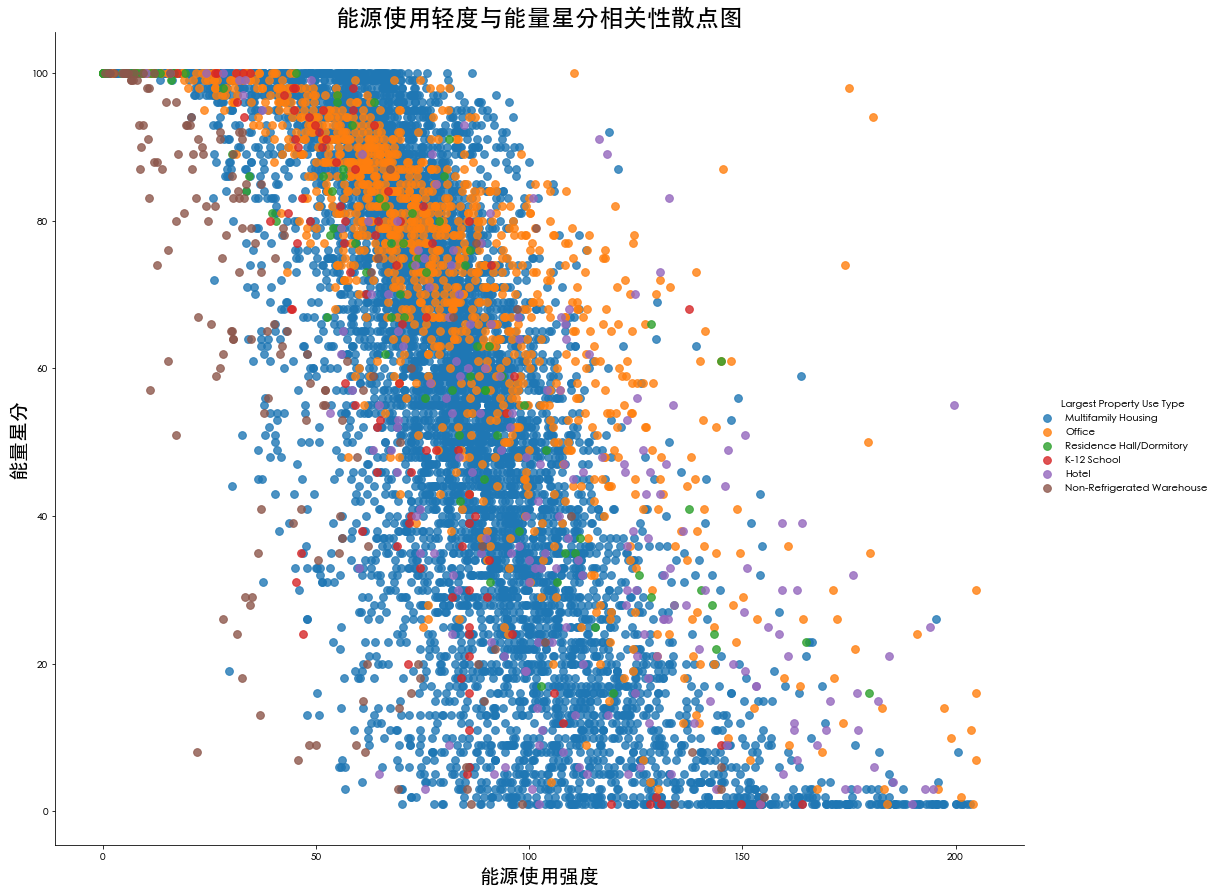

In [27]:
plt.figure(figsize=(18,18))
features['Largest Property Use Type'] = data['Largest Property Use Type']

# 限制超过100个观测值的建筑类型（来自之前的代码）
features = features[features['Largest Property Use Type'].isin(T)]

# 使用seaborn绘制Score与 Log Source EUI 的散点图
sns.lmplot(x='Site EUI (kBtu/ft²)',y='ENERGY STAR Score',
          hue = 'Largest Property Use Type',
          data = features,
          scatter_kws = {'alpha':0.8,'s': 60},
          fit_reg = False,
          size = 12,
          aspect = 1.2)

plt.xlabel("能源使用强度",size=20)
plt.ylabel('能量星分',size=20)
plt.title('能源使用轻度与能量星分相关性散点图',size=24)
plt.show()

能源使用强度与能量分呈现负相关，并非完全线性

### pairs plot
检测多变量特征分布的图像
> * 上三角形为散点图
> * 对角线为直方图
> * 下三角为相关系数密度图

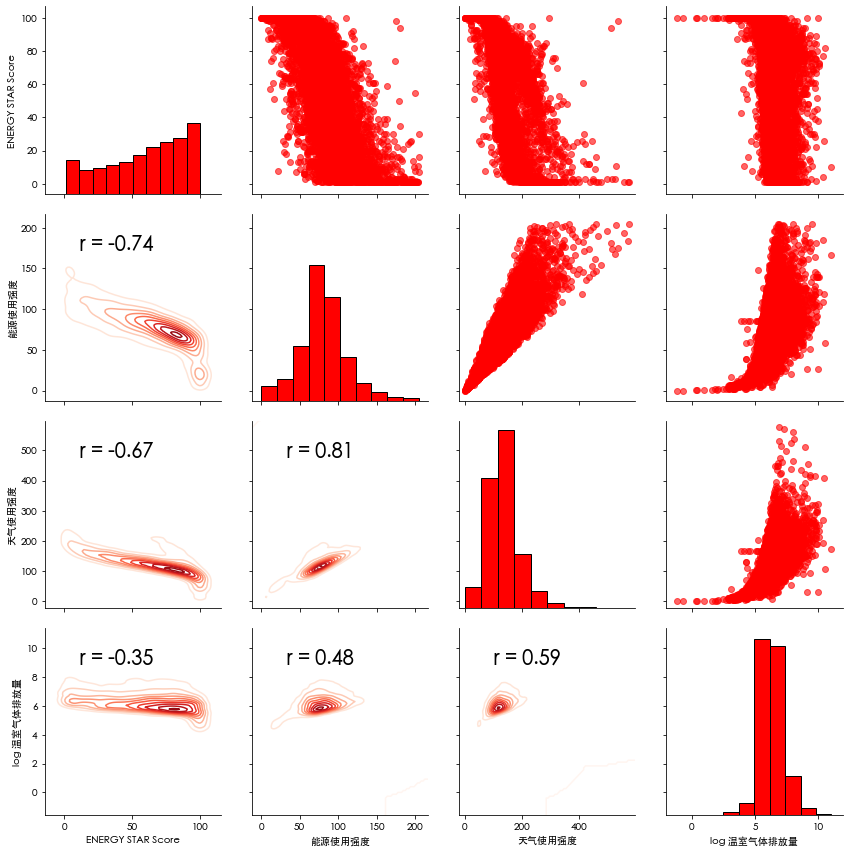

In [28]:
# 提取要绘制的列
plot_data = features[['ENERGY STAR Score',
                     'Site EUI (kBtu/ft²)',
                     'Weather Normalized Source EUI (kBtu/ft²)',
                     'Total GHG Emissions (Metric Tons CO2e)_log']]

# 把 inf 无穷换成 nan
plot_data = plot_data.replace({np.inf: np.nan,-np.inf:np.nan})

# 重命名
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': '能源使用强度',
                                        'Weather Normalized Source EUI (kBtu/ft²)':'天气使用强度',
                                        'Total GHG Emissions (Metric Tons CO2e)_log': 'log 温室气体排放量'})

# 删除 na 值
plot_data = plot_data.dropna()

# 计算某两列之间的相关系数
def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy = (.2,.8),
                xycoords = ax.transAxes,
                size = 20)
    
# 创建 pairgrid 对象
grid = sns.PairGrid(data = plot_data,size=3)

# 上三角是散点图
grid.map_upper(plt.scatter,color = 'red', alpha =0.6)

# 对角线是直方图
grid.map_diag(plt.hist,color ='red',edgecolor = 'black')

# 下三角是相关系数和二维核密度图
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot,cmap = plt.cm.Reds)

# 特征工程和选择
删除了无助于我们的模型学习特征与目标之间关系的特征。
## 特征工程
* 选择数字特征，
* 添加所有数字特征的对数转换，
* 选择分类特征并进行one-hot encodes 
* 最后将这些特征组合在一起

In [64]:
# 复制原始数据
features = data.copy()

# 选择数字列
numeric_subset  = data.select_dtypes('number')

# 使用数字列的对数创建新列
for col in numeric_subset.columns:
    # 跳过the Energy Star Score 这一列
    if col == 'ENERGY STAR Score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# 选择分类列
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# 使用concat对两个数据帧进行拼接，确保使用axis = 1来执行列绑定
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(11319, 110)

## 特征选择（去除共线性特征）
> 数据量较少的时候可以画出corr图，人为判断

In [65]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
       删除数据帧中相关系数大于阈值的共线特征。 删除共线特征可以帮助模型泛化并提高模型的可解释性。
        
    Inputs: 
        阈值：删除任何相关性大于此值的特征
    
    Output: 
        仅包含非高共线特征的数据帧
    '''
    
    # 不要删除能源之星得分之间的相关性
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # 计算相关性矩阵
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # 迭代相关性矩阵并比较相关性
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # 如果相关性超过阈值
            if val >= threshold:
                # 打印有相关性的特征和相关值
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # 删除每对相关列中的一个
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # 将得分添加回数据
    x['ENERGY STAR Score'] = y
               
    return x

In [66]:
# 删除大于指定相关系数的共线特征
# 设定区值为0.6
features = remove_collinear_features(features, 0.6);

In [71]:
# 删除所有 na 值的列
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

最终将110个特征值，转化为65个特征值，其中包括一个目标值，以及分类变量（one hot）

## 划分训练集和测试集

In [73]:
no_score = features[features['ENERGY STAR Score'].isna()]
no_score.shape

(1858, 65)

In [77]:
score = features[features['ENERGY STAR Score'].notnull()]
score.shape

(9461, 65)

得分中仍然存在有缺失数据，按30%作为训练集，70%作为数据集划分

In [78]:
features=score.drop(columns='ENERGY STAR Score')
targets=score['ENERGY STAR Score']
#用nan替换特征值中的无穷值
features=features.replace({np.inf:np.nan,-np.inf:np.nan})
x_train,x_test,y_train,y_test=train_test_split(features,targets,test_size=0.3,random_state=42)#random_state保证随机

In [81]:
Col=x_train.columns

## 建立Baseline
* 如果我们构建的模型不能胜过基线，那么我们可能不得不承认机器学习不适合这个问题。 这可能是
   * 因为我们没有使用正确的模型，
   * 因为我们需要更多的数据，
   * 或者因为有一个更简单的解决方案不需要机器学习。 

对于回归任务，一个好的基线是为测试集上的所有实例预测目标**在训练集上的中值**。

### 度量标准：平均绝对误差 - Mean Absolute Error（MAE）


Andrew Ng建议使用单个实值性能指标来比较模型，因为它简化了评估过程。我们应该使用一个数字，而不是计算多个指标并尝试确定每个指标的重要程度。

* 在这种情况下，因为我们进行回归，所以平均绝对误差是适当的度量。

* 这也是可以解释的，因为它代表我们估算的平均数量，如果与目标值单位相同。


In [36]:
def mae(y_true,y_predict):
    return np.mean(abs(y_predict-y_true))

In [37]:
baseline_=np.median(y_train)
print(baseline_)

66.0


In [38]:
mae(y_test,baseline_)

24.516379006692496

这表明我们对测试集的平均估计偏差约25%
# 机器学习模型的建立
## 机器学习库的导入

In [39]:
# 输入缺失值和缩放值
from sklearn.preprocessing import  MinMaxScaler
from sklearn import impute 

# 机器学习模型
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# 超参数调整
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

##  缺失值的处理
用列的中位数补充缺失值

In [40]:
# 使用中位数填充策略创建一个imputer对象
imputer = impute.SimpleImputer(strategy = 'median')

# Train on the training features
imputer.fit(x_train)

# 转换训练数据和测试数据
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

In [41]:
#确保没有缺失值
np.sum(np.isnan(x_train))

0

In [42]:
np.sum(np.isnan(x_test))

0

## 特征缩放
删除量纲的影响

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(x_train)

# 转换训练数据和测试数据
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
# 将y转换为一维数组（矢量）
y_train= np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

## 模型建立

In [45]:
# 定义训练模型，预测评估函数
def fit_and_evsluate(model):
    model.fit(x_train,y_train)
    
    model_pred=model.predict(x_test)
    model_mae=mae(model_pred,y_test)
    
    return model_mae

### 线性回归模型

In [46]:
lr=LinearRegression()
lr_mae=fit_and_evsluate(lr)
print(lr_mae)

13.465092871677838


### 支持向量机SVM

In [47]:
svm=SVR(C=1000,gamma=0.1)
svm_mae=fit_and_evsluate(svm)
print(svm_mae)

10.93372974821816


### k近邻法knn

In [48]:
knn=KNeighborsRegressor()
knn_mae=fit_and_evsluate(knn)
print(knn_mae)

12.705177879535048


### 随机森林


In [49]:
random_forest=RandomForestRegressor()
random_forest_mae=fit_and_evsluate(random_forest)
print(random_forest_mae)

9.759210989785137


### 决策树

In [50]:
tree=DecisionTreeRegressor()
tree_mae=fit_and_evsluate(tree)
print(tree_mae)

12.761535752025361


## 各个模型结果

<Figure size 720x720 with 0 Axes>

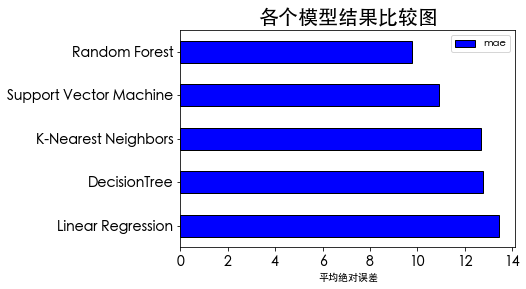

In [51]:
plt.figure(figsize=(10,10))
# Dataframe to hold the results
model_comparison = pd.DataFrame({'model':['Linear Regression',
                                          'Support Vector Machine',
                                          'Random Forest',
                                          'DecisionTree',
                                          'K-Nearest Neighbors'],
                                'mae':[lr_mae,
                                       svm_mae,
                                       random_forest_mae,
                                       tree_mae,
                                       knn_mae]})
# 测试集上 mae的水平条形图
model_comparison.sort_values('mae',ascending = False).plot(x = 'model',
                                                           y = 'mae',
                                                           kind = 'barh',
                                                           color = 'blue', 
                                                           edgecolor = 'black')
# 绘图格式
plt.ylabel('');
plt.yticks(size = 14);

plt.xlabel('平均绝对误差');
plt.xticks(size = 14)

plt.title('各个模型结果比较图', size = 20);

> # 模型优化
> 需要补充的内容

# 解释模型结果与结论
## 特征向量的重要性
从各个模型返回的平均绝对误差显示，随机森林的平均绝对误差最小，相比较效果最好，选择随机森林作为模型，分析各特征向量的关系

In [88]:
feature_results = pd.DataFrame({'feature': list(Col),'importance': random_forest.feature_importances_})
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

In [89]:
feature_results.head(10)

,feature,importance
0,Site EUI (kBtu/ft²),0.597463
1,Weather Normalized Site Electricity Intensity ...,0.145722
2,Largest Property Use Type_Multifamily Housing,0.061921
3,Property Id,0.022378
4,Order,0.018609
5,Year Built,0.017984
6,DOF Gross Floor Area,0.017412
7,log_Direct GHG Emissions (Metric Tons CO2e),0.016749
8,Census Tract,0.012685
9,Largest Property Use Type_Non-Refrigerated War...,0.012611


* Site EUI (kBtu/ft²) 
* Weather Normalized Site Electricity Intensity 
最重要的两个特征，这之后，特征的相对重要性大幅下降，这表明我们可能不需要保留所有特征来创建具有几乎相同性能的模型。

<Figure size 1296x1296 with 0 Axes>

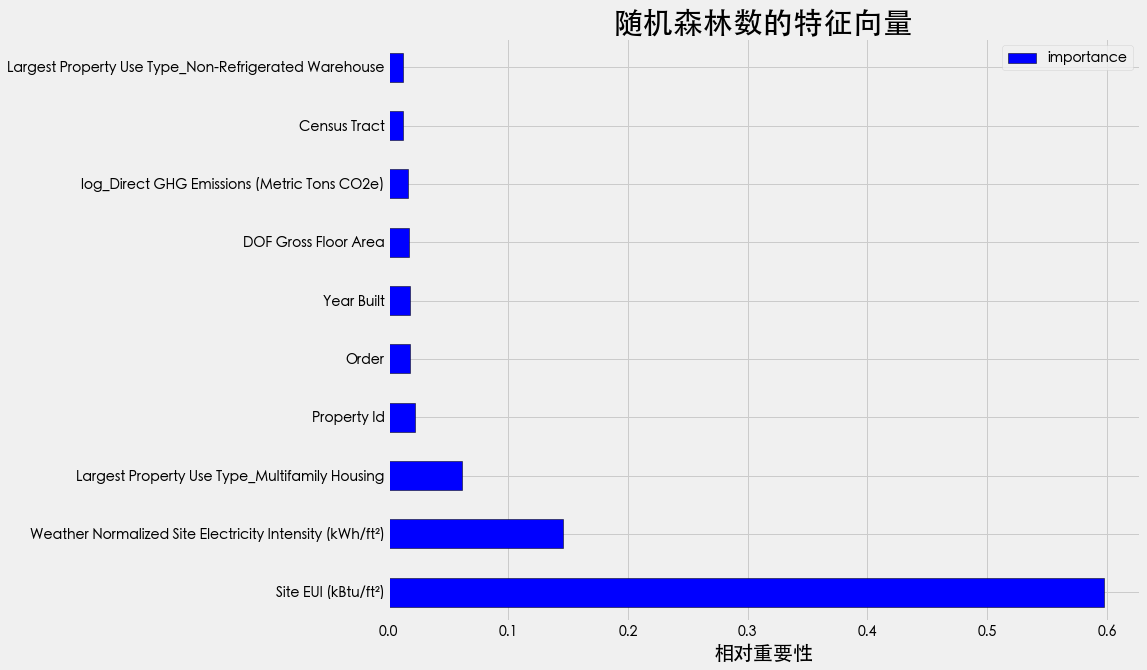

In [91]:
plt.figure(figsize=(18,18))
#截取前十个
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('相对重要性', size = 20); plt.ylabel('')
plt.title('随机森林数的特征向量', size = 30);

## 得出结论


1. 使用纽约市的能源数据，可以建立一个模型，可以预测建筑物的能源之星得分，误差在10分内。
2. `The Site EUI` and `Weather Normalized Electricity Intensity` 是预测能源之星得分的最相关特征。
